In [ ]:
# 시설물 데이터 준비
import pandas as pd
school_df = pd.read_csv('초중고.csv')
academy_df = pd.read_csv('학원.csv', encoding = 'cp949')
subway_df = pd.read_csv('지하철.csv', encoding = 'cp949')
bus_df = pd.read_csv('버스.csv', encoding = 'cp949')
apt_df = pd.read_csv('아파트.csv', encoding = 'cp949')
univ_df = pd.read_csv('대학교.csv', encoding = 'utf-8')
lcom_df = pd.read_csv('대기업.csv', encoding = 'utf-8')
ccom_df = pd.read_csv('공기업.csv', encoding = 'utf-8')
lcafe_df = pd.read_csv('저가형.csv', encoding = 'utf-8')
hcafe_df = pd.read_csv('고가형.csv', encoding = 'utf-8')

In [ ]:
# 시설물 위치를 point 객체로 변환
from shapely.geometry import Point
import geopandas as gpd

# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(school_df['Longitude'], school_df['Latitude'])]
school_gdf = gpd.GeoDataFrame(school_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
school_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(academy_df['Longitude'], academy_df['Latitude'])]
academy_gdf = gpd.GeoDataFrame(academy_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
academy_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(subway_df['lon'], subway_df['lat'])]
subway_gdf = gpd.GeoDataFrame(subway_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
subway_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(bus_df['경도'], bus_df['위도'])]
bus_gdf = gpd.GeoDataFrame(bus_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
bus_gdf.crs = "EPSG:4326"


# 컬럼의 데이터 타입이 문자열인지 확인 후 변환
if apt_df['좌표X'].dtype == object:
    apt_df['좌표X'] = apt_df['좌표X'].str.replace(',', '').astype(float)
else:
    apt_df['좌표X'] = apt_df['좌표X'].astype(float)

if apt_df['좌표Y'].dtype == object:
    apt_df['좌표Y'] = apt_df['좌표Y'].str.replace(',', '').astype(float)
else:
    apt_df['좌표Y'] = apt_df['좌표Y'].astype(float)

# 좌표 값을 Point 객체로 변환
geometry = [Point(xy) for xy in zip(apt_df['좌표X'], apt_df['좌표Y'])]
apt_gdf = gpd.GeoDataFrame(apt_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
apt_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(univ_df['경도'], univ_df['위도'])]
univ_gdf = gpd.GeoDataFrame(univ_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
univ_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(lcom_df['Longitude'], lcom_df['Latitude'])]
lcom_gdf = gpd.GeoDataFrame(lcom_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
lcom_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(ccom_df['Longitude'], ccom_df['Latitude'])]
ccom_gdf = gpd.GeoDataFrame(ccom_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
ccom_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(lcafe_df['경도'], lcafe_df['위도'])]
lcafe_gdf = gpd.GeoDataFrame(lcafe_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
lcafe_gdf.crs = "EPSG:4326"


# 시설물 데이터를 Point 객체로 변환
geometry = [Point(xy) for xy in zip(hcafe_df['경도'], hcafe_df['위도'])]
hcafe_gdf = gpd.GeoDataFrame(hcafe_df, geometry=geometry)

# 좌표계 설정 (EPSG:4326 - WGS 84)
hcafe_gdf.crs = "EPSG:4326"

In [ ]:
# 그리드로 구역 분할

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, Point

# 서울의 경계 좌표 (임의로 설정)
min_lat, max_lat = 37.413294, 37.715133
min_lon, max_lon = 126.734086, 127.269311

# 그리드의 간격 설정 (1 degree = 약 111 km)
grid_size = 0.003  # 약 0.3 km 간격

# 사각형 그리드를 담을 리스트
grid_cells = []
center_points = []

# 사각형 그리드 생성 및 중심점 계산
lat_steps = int((max_lat - min_lat) / grid_size)
lon_steps = int((max_lon - min_lon) / grid_size)

for i in range(lat_steps):
    for j in range(lon_steps):
        minx = min_lon + j * grid_size
        maxx = min_lon + (j + 1) * grid_size
        miny = min_lat + i * grid_size
        maxy = min_lat + (i + 1) * grid_size

        # 사각형 그리드 추가
        grid_cells.append(box(minx, miny, maxx, maxy))

        # 중심점 계산
        center_x = (minx + maxx) / 2
        center_y = (miny + maxy) / 2
        center_points.append(Point(center_x, center_y))

# Geopandas GeoDataFrame으로 변환
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'])
centers = gpd.GeoDataFrame(geometry=center_points)

# EPSG:4326 좌표계 사용
grid.crs = "EPSG:4326"
centers.crs = "EPSG:4326"

In [ ]:
# 시설물의 개수를 저장할 컬럼 추가
grid['school_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = school_gdf[school_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'school_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['school_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['academy_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = academy_gdf[academy_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'academy_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['academy_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['subway_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = subway_gdf[subway_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'subway_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['subway_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['bus_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = bus_gdf[bus_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'bus_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['bus_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['apt_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = apt_gdf[apt_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'apt_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['apt_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['univ_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = univ_gdf[univ_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'univ_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['univ_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['lcom_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = lcom_gdf[lcom_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'lcom_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['lcom_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['ccom_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = ccom_gdf[ccom_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'ccom_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['ccom_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['lcafe_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = lcafe_gdf[lcafe_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'lcafe_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['lcafe_count']))


# 시설물의 개수를 저장할 컬럼 추가
grid['hcafe_count'] = 0

# 각 그리드와 시설물 위치 비교
for idx, grid_cell in grid.iterrows():
    # 그리드에 속하는 시설물 찾기
    contained_facilities = hcafe_gdf[hcafe_gdf.within(grid_cell['geometry'])]

    # 해당 그리드의 시설물 개수 저장
    grid.at[idx, 'hcafe_count'] = len(contained_facilities)

# 결과 확인
print(max(grid['hcafe_count']))

6
194
2
76
7
4
3
4
6
53


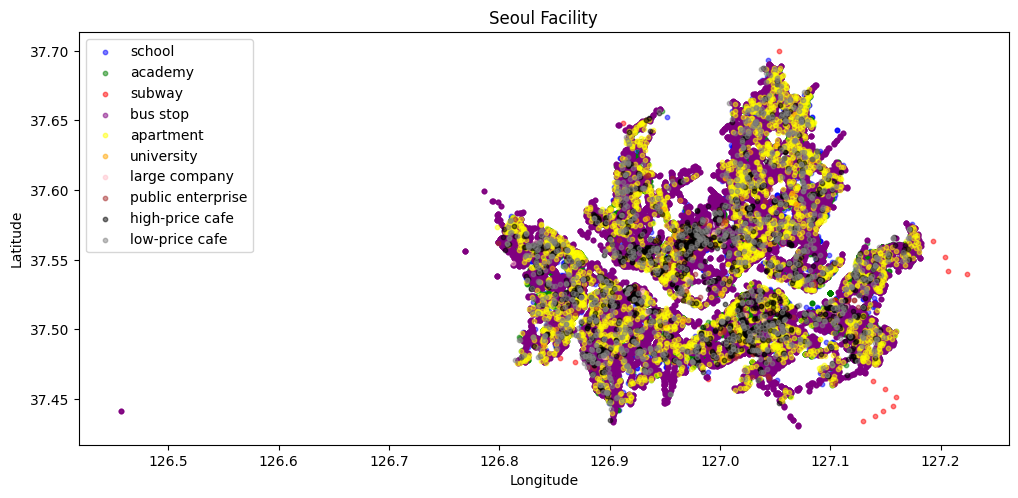

In [ ]:
min_lat, max_lat = 37.413294, 37.715133
min_lon, max_lon = 126.734086, 127.269311

import matplotlib.pyplot as plt
import geopandas as gpd

# 그리드의 바운딩 박스 계산
grid_bounds = grid.total_bounds  # [minx, miny, maxx, maxy]

# # 각 시설물 데이터가 그리드 범위 내에 있는지 확인하고 필터링
school_gdf_filtered = school_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
academy_gdf_filtered = academy_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
subway_gdf_filtered = subway_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
bus_gdf_filtered = bus_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
apt_gdf_filtered = apt_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
univ_gdf_filtered = univ_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
lcom_gdf_filtered = lcom_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
ccom_gdf_filtered = ccom_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
hcafe_gdf_filtered = hcafe_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]
lcafe_gdf_filtered = lcafe_gdf.cx[grid_bounds[0]:grid_bounds[2], grid_bounds[1]:grid_bounds[3]]

# 시각화
fig, ax = plt.subplots(figsize=(12, 12))

# 그리드에 따라 색상을 다르게 표시 (시설물 개수에 따라 색상 변화를 주기)
grid.plot(ax=ax, edgecolor='black', linewidth=0.5)

# 필터링된 시설물 위치 시각화 (원래 좌표에 있는 점들을 표시)
school_gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.5, label='school')
academy_gdf.plot(ax=ax, color='green', markersize=10, alpha=0.5, label='academy')
subway_gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5, label='subway')
bus_gdf.plot(ax=ax, color='purple', markersize=10, alpha=0.5, label='bus stop')
apt_gdf.plot(ax=ax, color='yellow', markersize=10, alpha=0.5, label='apartment')
univ_gdf.plot(ax=ax, color='orange', markersize=10, alpha=0.5, label='university')
lcom_gdf.plot(ax=ax, color='pink', markersize=10, alpha=0.5, label='large company')
ccom_gdf.plot(ax=ax, color='brown', markersize=10, alpha=0.5, label='public enterprise')
hcafe_gdf.plot(ax=ax, color='black', markersize=10, alpha=0.5, label='high-price cafe')
lcafe_gdf.plot(ax=ax, color='gray', markersize=10, alpha=0.5, label='low-price cafe')

# 범례 추가
plt.legend()

# 타이틀 및 축 레이블 설정
plt.title("Seoul Facility")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# 시각화 표시
plt.show()


In [ ]:
# 중심점 칼럼 추가

grid['centroid'] = grid.geometry.centroid

<ipython-input-281-362e64d6e3fb>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['centroid'] = grid.geometry.centroid


In [ ]:
# 모서리 좌표 칼럼 삭제

numdf = grid.drop(columns=['geometry'])

In [ ]:
# 삭제할 행을 저장할 리스트 초기화
rows_to_drop = []

# 'centroid' 열을 제외한 나머지 열 이름 리스트 생성
columns_to_check = numdf.columns[numdf.columns != 'centroid']

# 각 행을 검사하여 삭제할 인덱스를 찾음
for i in range(len(numdf)):
    # 'centroid' 열을 제외한 나머지 열의 값이 모두 0인지 확인
    if (numdf.loc[i, columns_to_check] == 0).all():
        rows_to_drop.append(i)

# 삭제할 행들을 제거
numdf = numdf.drop(rows_to_drop).reset_index(drop=True)

In [ ]:
# 카페 밀도 데이터 추가

numdf['density'] = 0

for i in range(len(numdf)):
    numdf.iloc[i, numdf.columns.get_loc('density')] = (
        numdf.iloc[i, numdf.columns.get_loc('hcafe_count')]
)

In [ ]:
# 카페 밀도의 상위 5% 여부를 리스트를 이용해 확인

li = []

for i in range(len(numdf)):
  li.append(numdf.iloc[i, numdf.columns.get_loc('density')])

li.sort()

In [ ]:
# 내림차순으로 정리

li.sort(reverse=True)

print(li)

[53, 16, 12, 10, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# 밀도 상위 5% 여부 칼럼 추가

numdf['density_rank'] = 0

for i in range(len(numdf)):
  if numdf.iloc[i, numdf.columns.get_loc('density')] >= li[43]:
    numdf.iloc[i, numdf.columns.get_loc('density_rank')] = 1

In [ ]:
numdf.to_csv('filtered_data(고가형)(찐최종).csv', index=False)

In [ ]:
numdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   school_count   4595 non-null   int64   
 1   academy_count  4595 non-null   int64   
 2   subway_count   4595 non-null   int64   
 3   bus_count      4595 non-null   int64   
 4   apt_count      4595 non-null   int64   
 5   univ_count     4595 non-null   int64   
 6   lcom_count     4595 non-null   int64   
 7   ccom_count     4595 non-null   int64   
 8   lcafe_count    4595 non-null   int64   
 9   hcafe_count    4595 non-null   int64   
 10  centroid       4595 non-null   geometry
 11  density        4595 non-null   int64   
 12  density_rank   4595 non-null   int64   
dtypes: geometry(1), int64(12)
memory usage: 466.8 KB
